## Tensorflow Binary and Multi-Class Classification

### Review the Basics

* **Input Neurons**: Number of features used by a neural network to make predictions.
* **Hidden Layers**: Application of weightings to inputs to provide desired outputs.
* **Output Neurons**: Predictions the neural network makes.

Using numbers to predict another number.

For example: Does the size, # of bathrooms/bedrooms etc. affect the value of a house? Based on those variables can we make predictions about the price?

In Machine Learning algorithms are trained to understand relationships between features and make predictions about labels.

### What is a Tensor?

Numerical representations of non-numerical data. Pink has no meaning as input, but .1 Red, .075 Green, and .079 Blue does if represented as [.1, .075, .079]

### How do we improve Predictions/Models?

* Fit on more data
* Increase hidden units: Add weightings to get desired output
* Try different activation functions: Helps decide what data is most important
* Try different optimization functions: Optimize by smoothing data to expected results
* Increasing learning rate: How much to change the model based on estimated error
* Fit longer: Increase the number of times we try to fit the data.

### Tensorflow Binary and Multi-Class Classification

Binary classification refers to something being one thing or another. 

| Hyperparameter | Binary Classification |
| :---: | :---: |
| Input Layer | Shape == number of features |
| Hidden Layers | Minimum of 1 to Unlimited |
| Neurons in Hidden Layer | Normally 10 to 100 |
| Output Layer | 1 |
| Hidden Activation | Usually Rectified Linear Unit (ReLU) |
| Output Activation | Sigmoid |
| Loss function | BinaryCrossentropy |
| Optimizer | Stochastic Gradient Descent, Adam |

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.utils import plot_model

### Get Wine Data

Location: https://www.kaggle.com/datasets/shelvigarg/wine-quality-dataset?select=winequalityN.csv

In [2]:
wine_data = pd.read_csv("https://raw.githubusercontent.com/derekbanas/tensorflow/main/winequalityN.csv")
wine_data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Delete Rows with Unknowns

In [3]:
wine_data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [4]:
wine_data = wine_data.dropna()
wine_data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Rename Column

In [5]:
wine_data.rename(columns={"type":"white_wine"}, inplace=True)
wine_data

/tmp/ipykernel_1167/1621346851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data.rename(columns={"type":"white_wine"}, inplace=True)


,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Change white_wine Based on Condition

In [6]:
wine_data.loc[wine_data['white_wine'] == "white", "white_wine"] = 1
wine_data.loc[wine_data['white_wine'] == "red", "white_wine"] = 0
wine_data

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Change Quality Based on Condition

In [7]:
wine_data.loc[wine_data["quality"] <= 6, "quality"] = 0
wine_data.loc[wine_data["quality"] >= 7, "quality"] = 1
wine_data

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


### How many Good Wines?

In [8]:
(wine_data['quality'] == 1).sum(), len(wine_data)

(1271, 6463)

### Normalize Our Data

In [9]:
ct = make_column_transformer(
    (MinMaxScaler(), ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", 
                      "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
                     "pH", "sulphates", "alcohol"])
)

### Separate Features and Labels

In [10]:
X = wine_data.drop("quality", axis=1) # features
y = wine_data["quality"] # label
X

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Split into Train and Test Data

In [11]:
# Get first 80% 
len(wine_data) * 0.8

5170.400000000001

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

### Transform Training and Test Data

In [13]:
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [14]:
X_train_normal

array([[0.21487603, 0.11333333, 0.22289157, ..., 0.34645669, 0.1011236 ,
        0.44927536],
       [0.23966942, 0.12666667, 0.18674699, ..., 0.40944882, 0.19101124,
        0.23188406],
       [0.63636364, 0.15333333, 0.30722892, ..., 0.22834646, 0.3988764 ,
        0.26086957],
       ...,
       [0.27272727, 0.12      , 0.20481928, ..., 0.25984252, 0.1741573 ,
        0.15942029],
       [0.18181818, 0.08      , 0.14457831, ..., 0.4488189 , 0.14044944,
        0.50724638],
       [0.30578512, 0.07333333, 0.20481928, ..., 0.28346457, 0.15168539,
        0.44927536]])

#### Tensorflow Playground

Reproduce results from https://playground.tensorflow.org/ using ReLU with code. 

* Ratio of Training to Test: 80%
* Learning Rate: 0.001
* Activation: ReLU
* Regularization: None
* Regularization Rate: 0
* Problem Type: Classification

### Activations

2024-10-25 11:18:38.102358: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-10-25 11:18:38.104114: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-25 11:18:38.127270: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


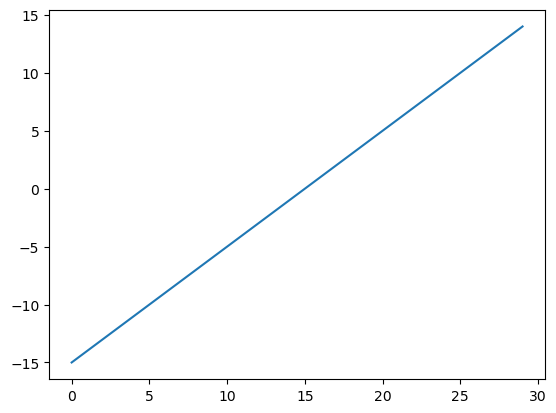

In [15]:
samp_ten = tf.cast(tf.range(-15, 15), tf.float32)
plt.plot(samp_ten)
plt.show()

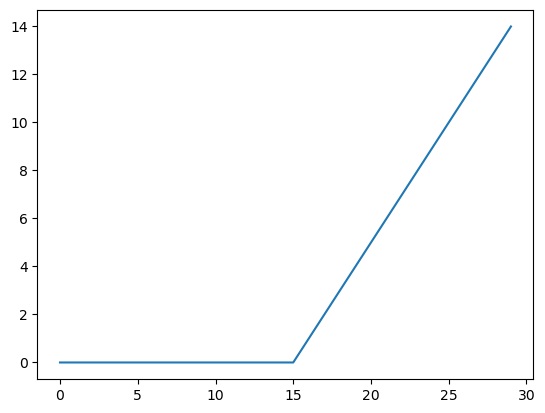

In [16]:
# ReLU
def relu(x):
    return tf.maximum(0, x)

plt.plot(relu(samp_ten))
plt.show()

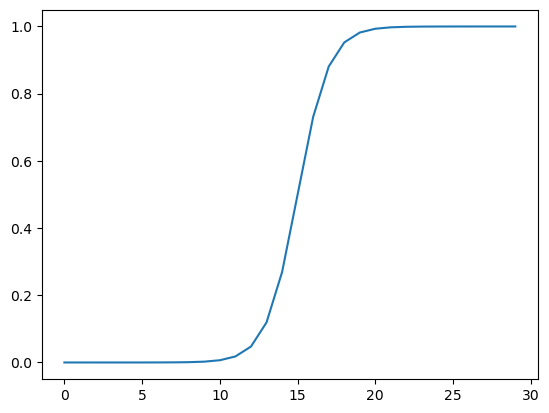

In [17]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

plt.plot(sigmoid(samp_ten))
plt.show()

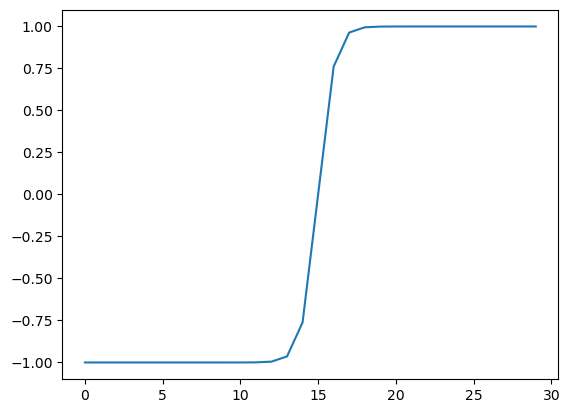

In [18]:
def tanh(x):
    return tf.tanh(x)

plt.plot(tanh(samp_ten))
plt.show()

### Build Model

In [19]:
tf.random.set_seed(66)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history = model_1.fit(X_train_normal, y_train, epochs=100) 

2024-10-25 11:18:39.029447: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-10-25 11:18:39.030294: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2300000000 Hz


Epoch 1/100
162/162 [==============================] - 1s 1ms/step - loss: 0.5139 - accuracy: 0.8064
Epoch 2/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4711 - accuracy: 0.7989
Epoch 3/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4314 - accuracy: 0.8184
Epoch 4/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4212 - accuracy: 0.8100
Epoch 5/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8059
Epoch 6/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.7979
Epoch 7/100
162/162 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8031
Epoch 8/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4040 - accuracy: 0.8079
Epoch 9/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8016
Epoch 10/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4062 - accura

In [20]:
model_1.evaluate(X_train_normal, y_train)

162/162 [==============================] - 0s 677us/step - loss: 0.4548 - accuracy: 0.7942


[0.4547700583934784, 0.7941973209381104]

### Correlation Matrix

<Axes: >

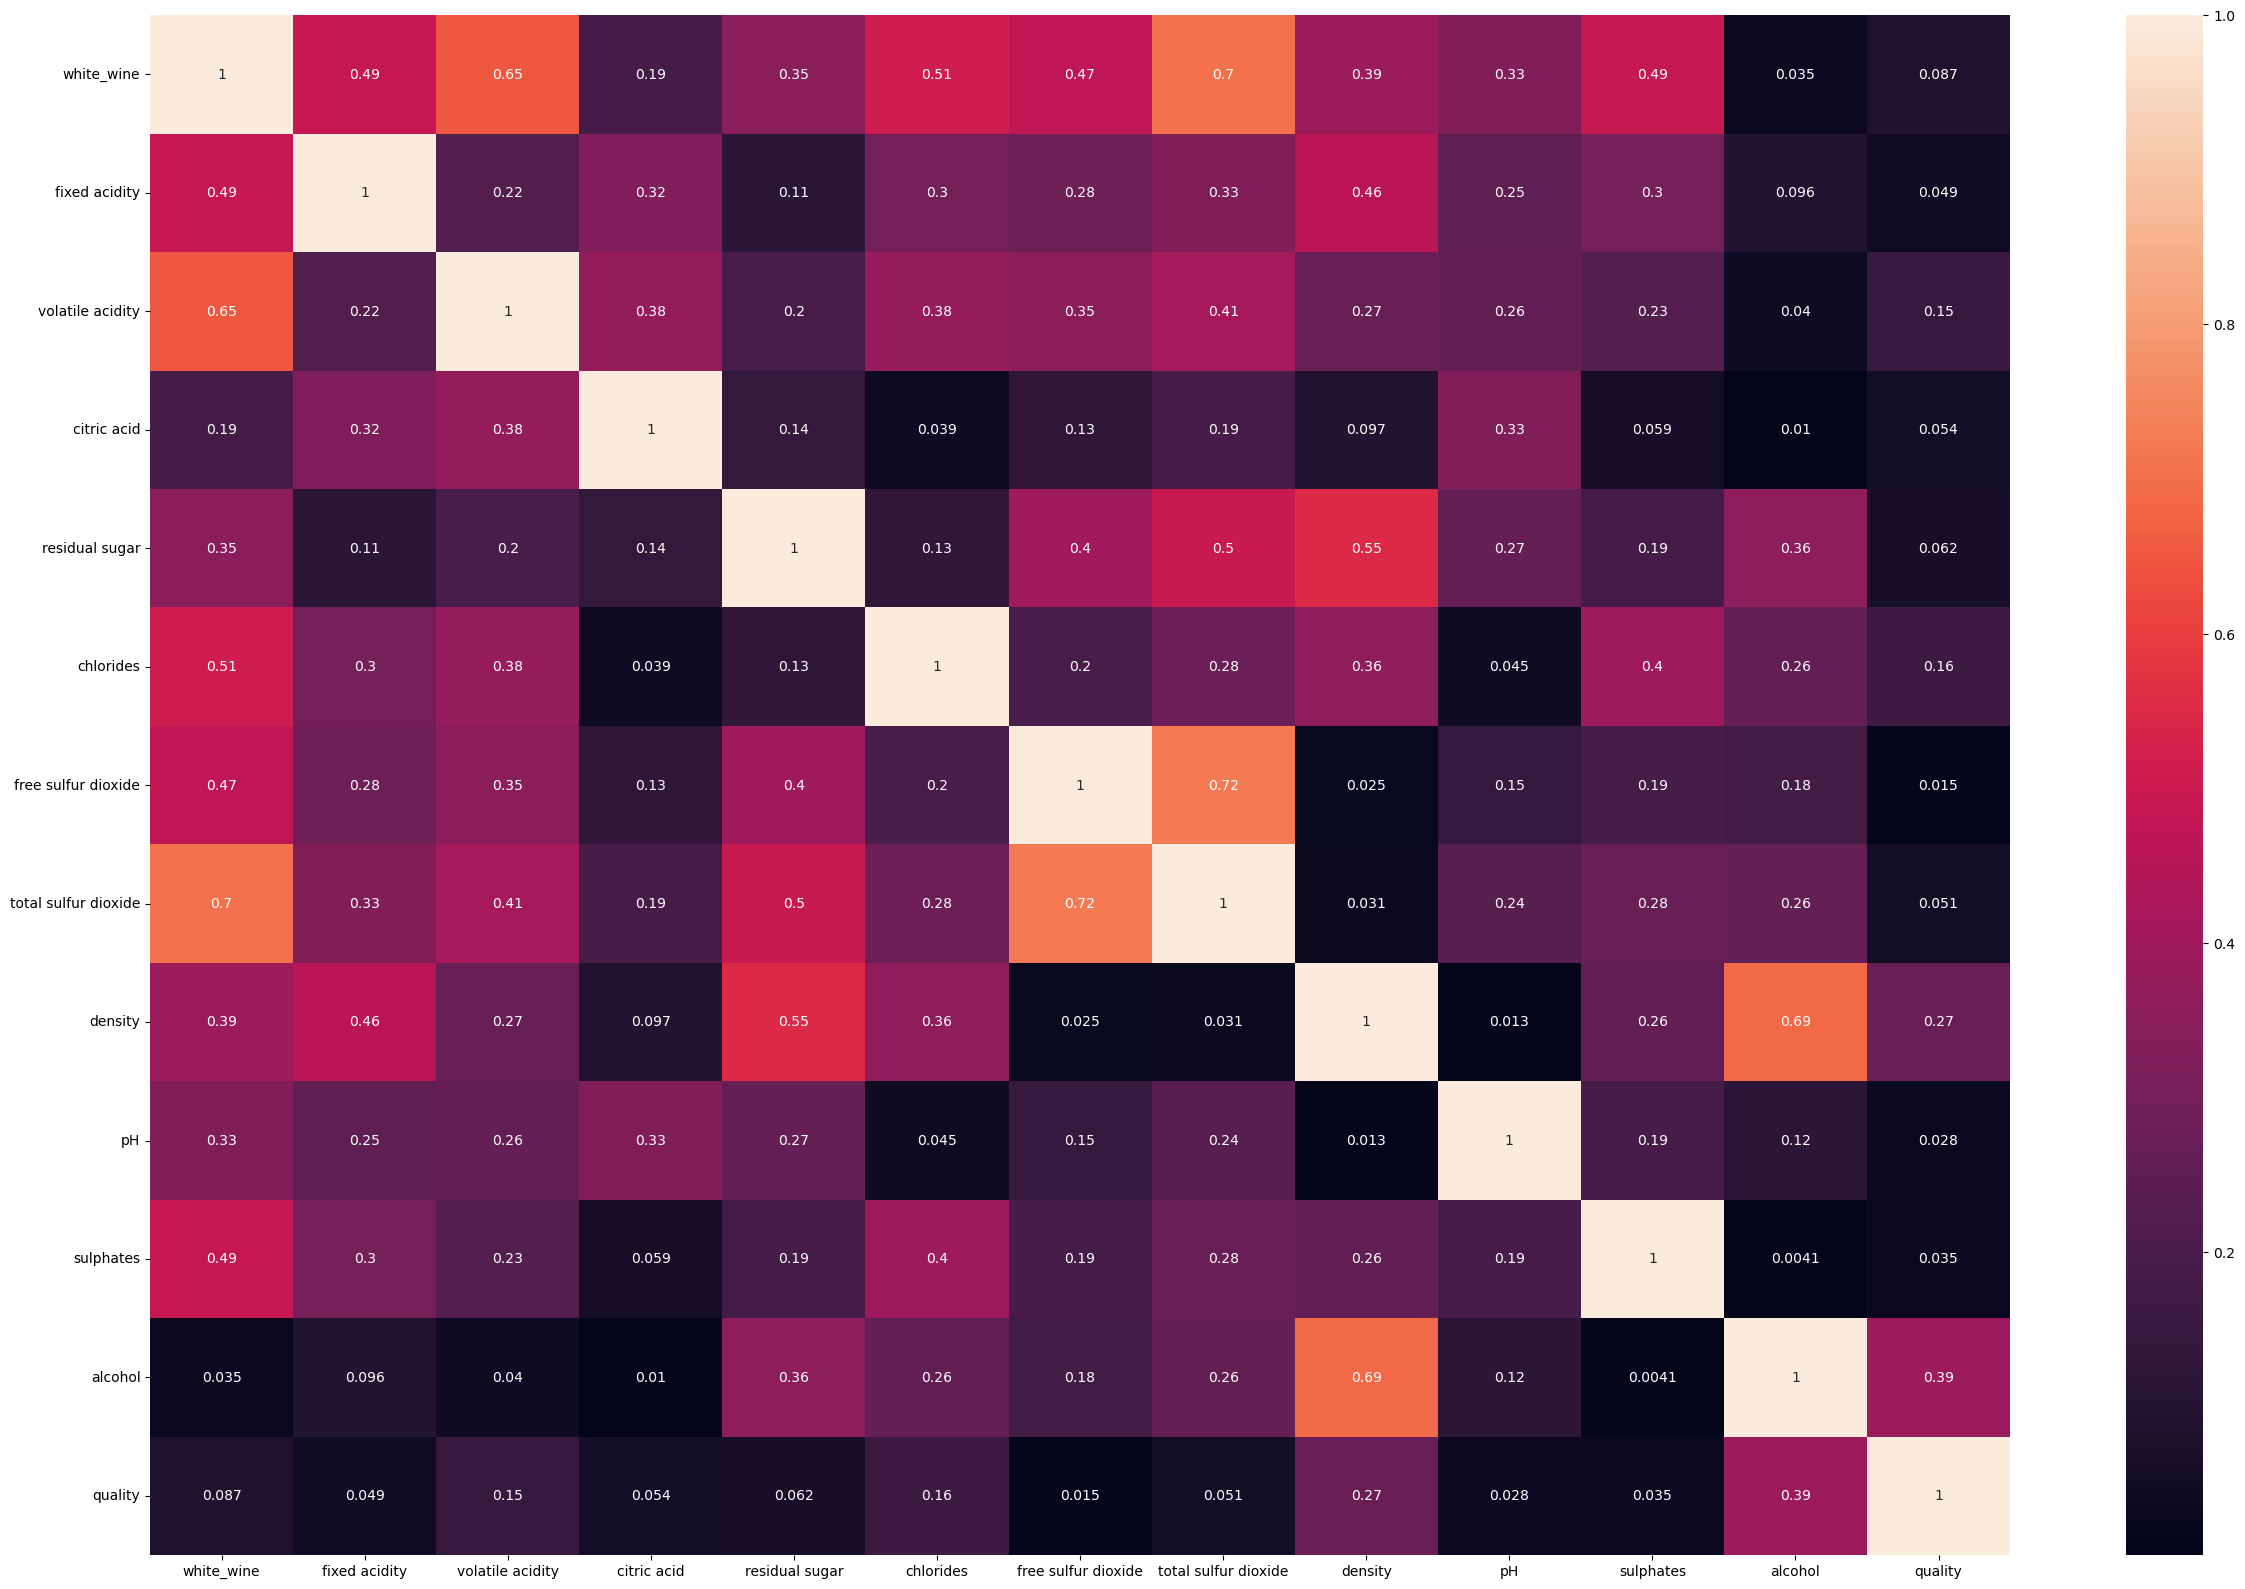

In [21]:
plt.figure(figsize=(30,20))
sns.heatmap(wine_data.corr().abs(), annot=True)

### Plot Loss Curve

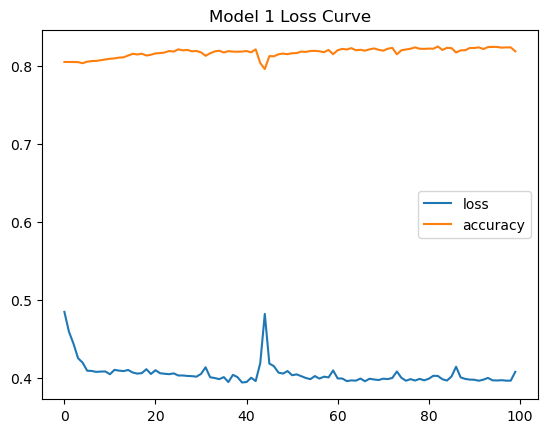

In [22]:
pd.DataFrame(history.history).plot()
plt.title("Model 1 Loss Curve")
plt.show()

### Use Callback to find Ideal Learning Rate

In [23]:
tf.random.set_seed(66)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history_lr = model_2.fit(X_train_normal, y_train, epochs=100, callbacks=[scheduler]) 

Epoch 1/100
162/162 [==============================] - 1s 1ms/step - loss: 0.5915 - accuracy: 0.8064
Epoch 2/100
162/162 [==============================] - 0s 1ms/step - loss: 0.5353 - accuracy: 0.7989
Epoch 3/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.8184
Epoch 4/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.8102
Epoch 5/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.8064
Epoch 6/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.7981
Epoch 7/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.7998
Epoch 8/100
162/162 [==============================] - 1s 3ms/step - loss: 0.4639 - accuracy: 0.8066
Epoch 9/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.8019
Epoch 10/100
162/162 [==============================] - 0s 1ms/step - loss: 0.4604 - accura

### Plot Learning Rate Versus the Loss

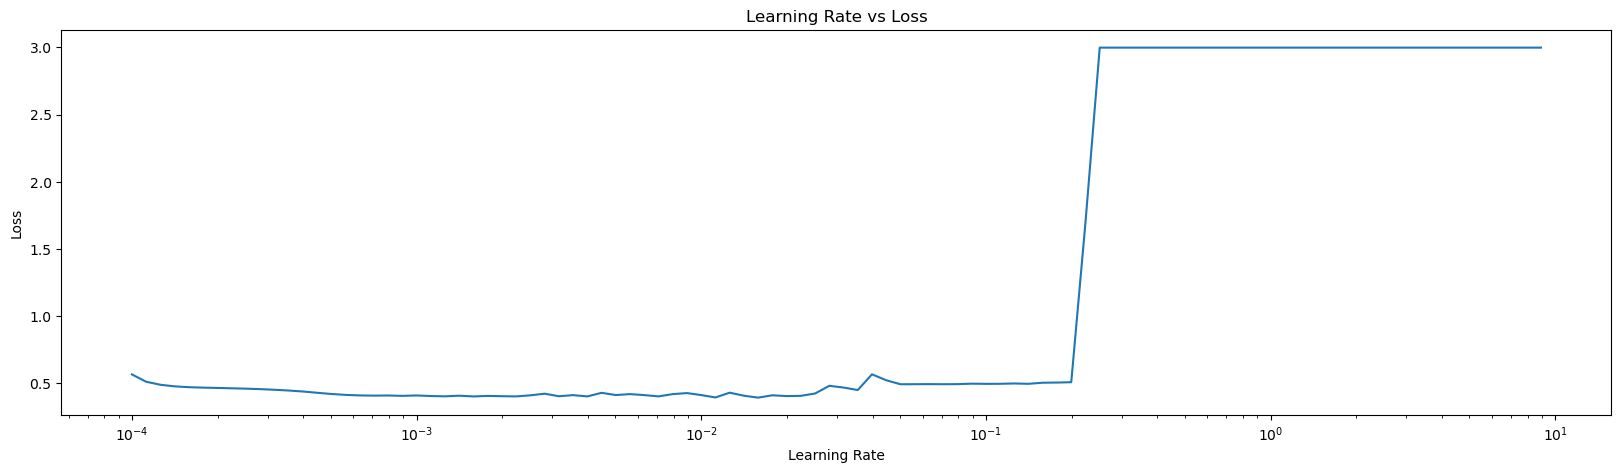

In [24]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(20,5))
plt.semilogx(lrs, history_lr.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.show()

### Evaluate with Test Data

In [25]:
loss, acc = model_1.evaluate(X_test_normal, y_test)
print(f"Model Loss (Test Set) : {loss}")
print(f"Model Accuracy (Test Set) : {acc}")

41/41 [==============================] - 0s 712us/step - loss: 0.4742 - accuracy: 0.7718
Model Loss (Test Set) : 0.4742087423801422
Model Accuracy (Test Set) : 0.7718484401702881


### Understanding the Model

In [26]:
# !pip install pydot

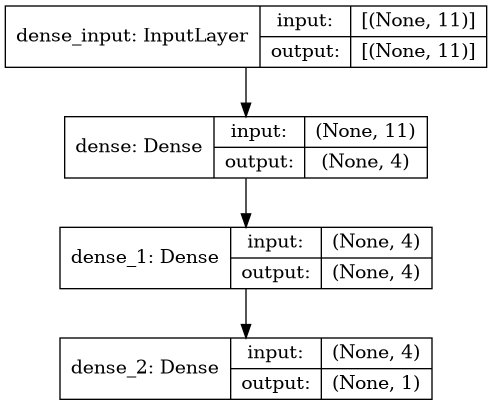

In [27]:
plot_model(model_1, show_shapes=True)

In [28]:
weights, biases = model_1.layers[1].get_weights()
weights, weights.shape

(array([[ 0.00808954, -0.49603727, -0.17071617,  0.71827435],
        [ 0.07250277,  0.8759045 , -0.03552812, -0.598288  ],
        [-0.09225198, -0.02819807, -0.19704801,  0.64610004],
        [-0.17595045, -0.794595  ,  0.48950917,  0.79167074]],
       dtype=float32),
 (4, 4))

In [29]:
biases, biases.shape

(array([-0.05576154,  0.14694488,  0.18760099,  0.10020897], dtype=float32),
 (4,))

### MultiClass Classification

### Download Data and Split into Training and Test

In [31]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


### View Image

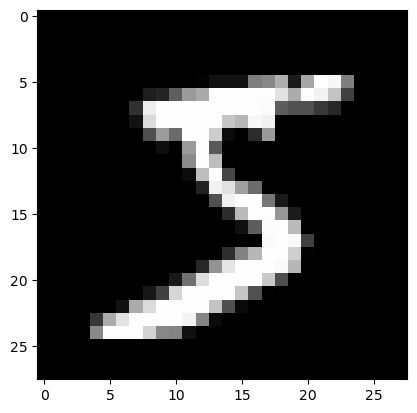

In [32]:
plt.imshow(X_train[0], cmap="gray")
plt.show()

### Normalize the Features

In [33]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

### Show Unique values in Label Numpy Array

In [34]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Store Label Names

In [35]:
label_names = np.unique(y_test)

| Hyperparameter | Binary Classification |
| :---: | :---: |
| Input Layer | Shape == number of features |
| Hidden Layers | Minimum of 1 to Unlimited |
| Neurons in Hidden Layer | Normally 10 to 100 |
| Output Layer | 1 per class |
| Hidden Activation | Usually Rectified Linear Unit (ReLU) |
| Output Activation | Softmax |
| Loss function | CategoricalCrossentropy |
| Optimizer | Stochastic Gradient Descent, Adam |

### Build Model

In [38]:
tf.random.set_seed(66)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_3 = model_3.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7044 - accuracy: 0.3902 - val_loss: 0.8054 - val_accuracy: 0.7317
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7614 - accuracy: 0.7469 - val_loss: 0.6764 - val_accuracy: 0.7763
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6641 - accuracy: 0.7774 - val_loss: 0.6293 - val_accuracy: 0.7931
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6200 - accuracy: 0.7960 - val_loss: 0.6008 - val_accuracy: 0.8069
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6082 - accuracy: 0.8049 - val_loss: 0.5836 - val_accuracy: 0.8236
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5739 - accuracy: 0.8269 - val_loss: 0.5625 - val_accuracy: 0.8380
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5513 - accuracy: 0.8396 - val_loss: 0.5454 - val_accuracy:

### Find Ideal Learning Rate

In [42]:
tf.random.set_seed(66)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

history_4 = model_4.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test), callbacks=[scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2475 - accuracy: 0.1881 - val_loss: 2.0627 - val_accuracy: 0.2007
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0074 - accuracy: 0.2451 - val_loss: 1.7653 - val_accuracy: 0.3396
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6802 - accuracy: 0.3831 - val_loss: 1.4446 - val_accuracy: 0.5127
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3865 - accuracy: 0.5413 - val_loss: 1.2177 - val_accuracy: 0.6460
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1799 - accuracy: 0.6442 - val_loss: 1.0456 - val_accuracy: 0.6691
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0168 - accuracy: 0.6738 - val_loss: 0.9317 - val_accuracy: 0.6850
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9121 - accuracy: 0.6981 - val_loss: 0.8538 - val_accuracy:

### Plot to Find Ideal Learning Rate

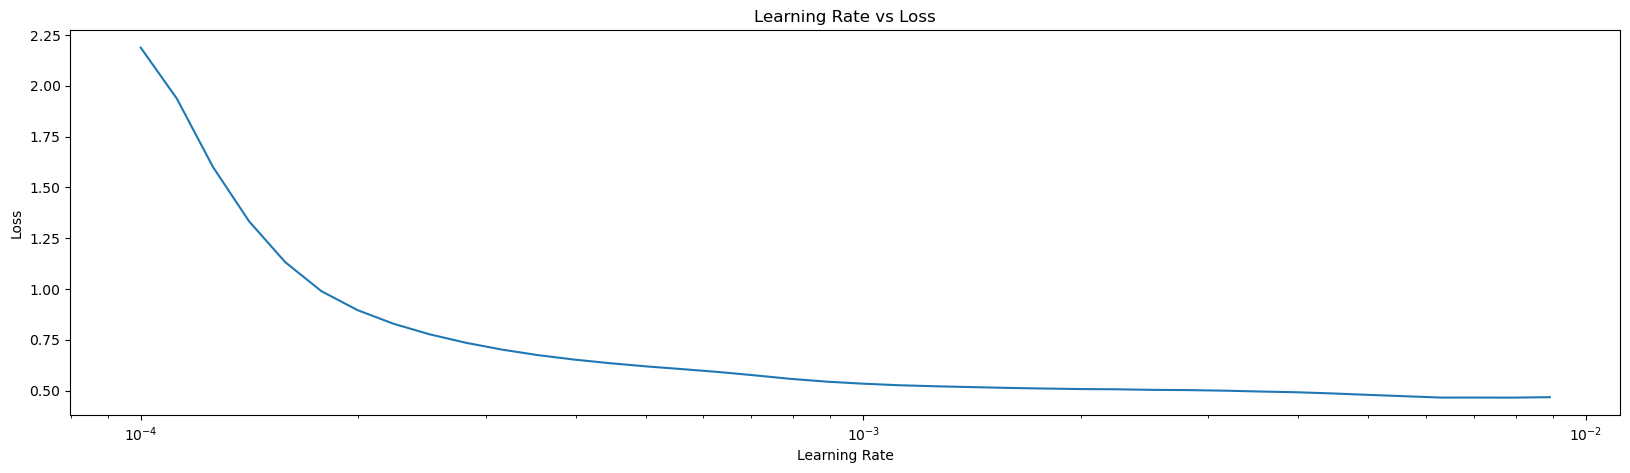

In [43]:
lrs = 1e-4 * (10 ** (tf.range(40)/20))
plt.figure(figsize=(20,5))
plt.semilogx(lrs, history_4.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.show()

### Make Prediction with Model

In [44]:
y_prob = model_4.predict(X_test)
y_prob[0]

array([3.3307850e-05, 5.1792588e-09, 6.2462117e-05, 1.2864115e-03,
       1.1489680e-06, 7.7009399e-06, 3.6443118e-10, 9.9339175e-01,
       5.1024348e-05, 5.1662759e-03], dtype=float32)

In [47]:
label_names[tf.argmax(y_prob[10])]

0

In [48]:
y_test[10]

0